✅ Dataset extracted to: /content/animals10
Classes found: ['elefante', 'cane', 'pecora', 'gatto', 'cavallo', 'ragno', 'farfalla', 'mucca', 'scoiattolo', 'gallina']
Found 26164 files belonging to 10 classes.
Using 20932 files for training.
Found 26164 files belonging to 10 classes.
Using 5232 files for validation.
✅ Datasets loaded. Class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

✅ Training ZFNet...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.2783 - loss: 2.0546 - val_accuracy: 0.3639 - val_loss: 1.9176
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.4808 - loss: 1.5180 - val_accuracy: 0.2609 - val_loss: 2.4537
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.5630 - loss: 1.2827 - val_accuracy: 0.4948 - val_loss: 1.6657
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - accuracy: 0.6210 - loss: 1.1199 - val_accuracy: 0.2401 - val_loss: 2.8631
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.6682 - loss: 0.9932 - val_accuracy: 0.6047 - val_loss: 1.1984
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.7161 - loss: 0.8451 - val_accuracy: 0.5753 - val_loss: 1.3542
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.7512 - loss: 0.7436 - val_accuracy: 0.5256 - val_loss: 1.4731
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 86s 72ms/step - accuracy: 0.7718 - loss: 0.6698 - 

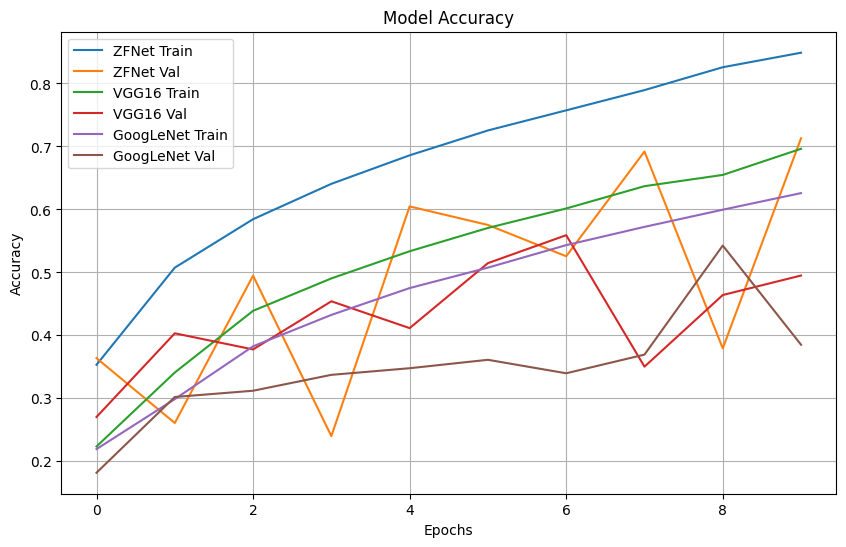

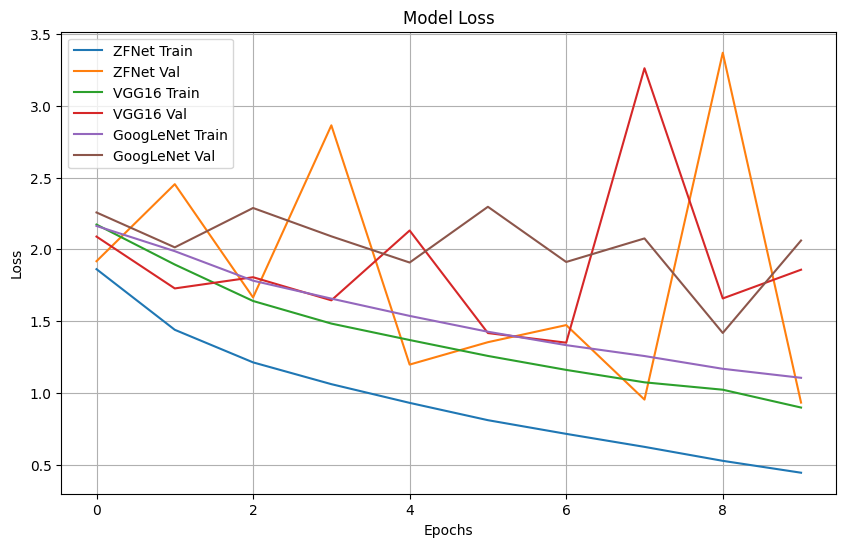


🔍 Final Accuracy and Inference Time Comparison:
ZFNet     - Accuracy: 0.7129, Time: 682.22s
VGG16     - Accuracy: 0.4950, Time: 3760.50s
GoogLeNet - Accuracy: 0.3851, Time: 837.58s


In [ ]:
# ========================
# 📦 STEP 1: Load Dataset
# ========================
import zipfile
import os

# Path where Colab stores uploaded files
zip_path = '/content/archive.zip'
extract_path = '/content/archive'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)

# Set image directory inside extracted folder
raw_images_path = os.path.join(extract_path, 'raw-img')

# List class folders
class_dirs = os.listdir(raw_images_path)
print("Classes found:", class_dirs)

# ========================
# 📦 STEP 2: Load with TensorFlow
# ========================
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    raw_images_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    raw_images_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

print("✅ Datasets loaded. Class names:", train_ds.class_names)

# ========================
# 🧠 STEP 3: Model Definitions (ZFNet, VGG16, GoogLeNet)
# ========================
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.models import Sequential

# --- ZFNet ---
def build_zfnet(input_shape=(224, 224, 3), num_classes=10):
    model = Sequential()
    model.add(layers.Conv2D(96, (7, 7), strides=2, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (5, 5), strides=2, activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# --- VGG16 ---
def build_vgg16(input_shape=(224, 224, 3), num_classes=10):
    model = Sequential()
    for filters in [64, 128, 256, 512, 512]:
        model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=input_shape if filters==64 else None))
        model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        if filters >= 256:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# --- GoogLeNet (Inception v1) ---
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1,1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1,1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3,3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1,1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5,5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3,3), strides=1, padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1,1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet(input_shape=(224,224,3), num_classes=10):
    input_layer = Input(shape=input_shape)
    x = layers.Conv2D(64, (7,7), strides=2, padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)
    x = layers.Conv2D(64, (1,1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3,3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    return Model(input_layer, output_layer)

# ========================
# 🏋️ STEP 4: Train + Evaluate All Models
# ========================
import time
import matplotlib.pyplot as plt

def train_and_evaluate(model, name):
    model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    start = time.time()
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    duration = time.time() - start
    loss, acc = model.evaluate(val_ds)
    print(f"📊 {name} Accuracy: {acc:.4f} | Inference Time: {duration:.2f}s")
    return history, acc, duration

print("\n✅ Training ZFNet...")
zfnet_history, zfnet_acc, zfnet_time = train_and_evaluate(build_zfnet(input_shape=(224,224,3), num_classes=len(train_ds.class_names)), "ZFNet")

print("\n✅ Training VGG16...")
vgg16_history, vgg16_acc, vgg16_time = train_and_evaluate(build_vgg16(input_shape=(224,224,3), num_classes=len(train_ds.class_names)), "VGG16")

print("\n✅ Training GoogLeNet...")
googlenet_history, googlenet_acc, googlenet_time = train_and_evaluate(build_googlenet(input_shape=(224,224,3), num_classes=len(train_ds.class_names)), "GoogLeNet")

# ========================
# 📈 STEP 5: Plot Accuracy and Loss
# ========================
def plot_history(histories, labels, metric):
    plt.figure(figsize=(10, 6))
    for hist, label in zip(histories, labels):
        plt.plot(hist.history[metric], label=f'{label} Train')
        plt.plot(hist.history[f'val_{metric}'], label=f'{label} Val')
    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([zfnet_history, vgg16_history, googlenet_history], ['ZFNet', 'VGG16', 'GoogLeNet'], 'accuracy')
plot_history([zfnet_history, vgg16_history, googlenet_history], ['ZFNet', 'VGG16', 'GoogLeNet'], 'loss')

# ========================
# 📊 STEP 6: Final Summary
# ========================
print("\n🔍 Final Accuracy and Inference Time Comparison:")
print(f"ZFNet     - Accuracy: {zfnet_acc:.4f}, Time: {zfnet_time:.2f}s")
print(f"VGG16     - Accuracy: {vgg16_acc:.4f}, Time: {vgg16_time:.2f}s")
print(f"GoogLeNet - Accuracy: {googlenet_acc:.4f}, Time: {googlenet_time:.2f}s")

